## Netflix analysis

### How many movies vs tv shows?
### Most common genres and ratings?
### Top countries producing Netflix content?
### Content released by years.
### Word clouds from description/titles.

### Use description and genre to recommend similar shows
### Approach TF-IDF + Cosine similarity

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("netflix_titles.csv")

In [3]:
df.shape

(8807, 12)

In [4]:
df.info

<bound method DataFrame.info of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mab

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
display(df[0:20])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [7]:
# show total missing values per column

df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [8]:
# instead of droping the columns with missing values, like:

df = df.drop(columns=['show_id'])

In [9]:
df[:5]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
# lets handle the columns with missing values

In [10]:
df['director'].fillna('Not Available', inplace=True)
df['cast'].fillna('Not Available', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)
df['duration'].fillna('Unknown', inplace=True)

In [11]:
df[0:5]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,Not Available,Not Available,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
missing_date = df['date_added'].isnull().sum()
print(missing_date)

10


In [13]:
df['date_added'].dtypes

dtype('O')

In [14]:
df['date_added'] = df['date_added'].fillna(pd.to_datetime('01-01-' + df['release_year'].astype(str)))

In [15]:
missing_date = df['date_added'].isnull().sum()
print(missing_date)

0


In [16]:
# show total missing values per column

df.isnull().sum().sort_values(ascending=False)

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [17]:
df.dropna(subset=['description'], inplace=True)

In [18]:
# convert date_added to to datetime format

In [19]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [20]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [21]:
df[:5]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,TV Show,Jailbirds New Orleans,Not Available,Not Available,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


In [22]:
# lets standardize the text columns

In [23]:
df['title'] = df['title'].str.strip()
df['listed_in'] = df['listed_in'].str.strip()
df['description'] = df['description'].str.strip()

In [24]:
df[:5]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,TV Show,Jailbirds New Orleans,Not Available,Not Available,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8807 non-null   object        
 1   title         8807 non-null   object        
 2   director      8807 non-null   object        
 3   cast          8807 non-null   object        
 4   country       8807 non-null   object        
 5   date_added    8807 non-null   datetime64[ns]
 6   release_year  8807 non-null   int64         
 7   rating        8807 non-null   object        
 8   duration      8807 non-null   object        
 9   listed_in     8807 non-null   object        
 10  description   8807 non-null   object        
 11  year_added    8807 non-null   int64         
 12  month_added   8807 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 963.3+ KB


In [26]:
df.dropna(subset=['description'], inplace=True)

In [27]:
df[6804:6809]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
6804,Movie,Friday the 13th,Marcus Nispel,"Jared Padalecki, Danielle Panabaker, Amanda Ri...",United States,2020-01-01,2009,R,97 min,Horror Movies,A group of teenage camp counselors raises the ...,2020,1
6805,Movie,Friend Request,Simon Verhoeven,"Alycia Debnam-Carey, William Moseley, Connor P...",Germany,2018-04-18,2016,R,92 min,"Horror Movies, International Movies",A popular college student's love of social med...,2018,4
6806,TV Show,Friends,Not Available,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,2003-01-01,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...,2003,1
6807,Movie,From Japan to Egypt,Mahmoud Karim,"Ahmed Eid, Saki Tsukamoto, Nada Moussa, Mohamm...",Egypt,2019-06-06,2017,TV-14,93 min,"Children & Family Movies, Comedies, Dramas",After his wife relocates to her home country o...,2019,6
6808,Movie,From Paris with Love,Pierre Morel,"John Travolta, Jonathan Rhys Meyers, Kasia Smu...","France, United Kingdom, United States",2020-09-08,2010,R,93 min,"Action & Adventure, International Movies",A low-level intelligence agent gets pulled int...,2020,9


In [28]:
df[df[['date_added']].isnull().any(axis=1)]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added


## How many movies vs tv shows? 

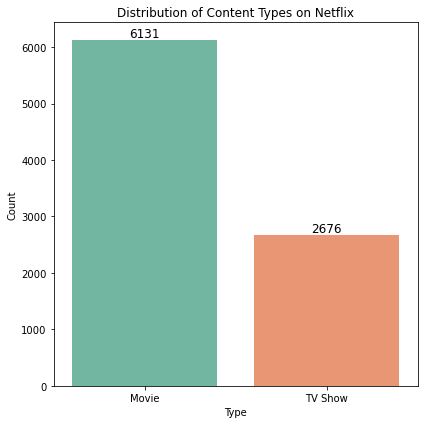

In [32]:
# plot of movies vs tv shows
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plot = sns.countplot(data=df, x='type', palette='Set2')

for p in plot.patches:
    height = p.get_height()
    plot.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=12, color='black')


plt.title("Distribution of Content Types on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Content added per year

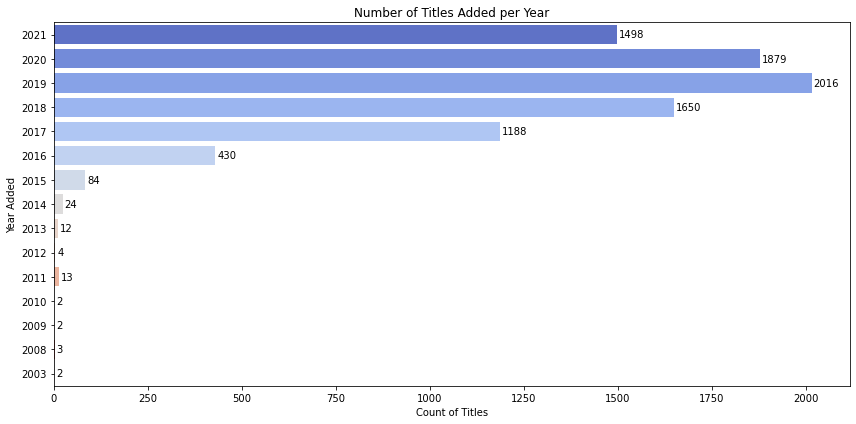

In [33]:
df_years = df[df['year_added'].notnull()]

plt.figure(figsize=(12,6))

ax = sns.countplot(data=df_years, y = 'year_added', 
                          order = sorted(df_years['year_added'].unique(), reverse=True),
                          palette= 'coolwarm'            
                         )

for p in ax.patches:
    count = p.get_width()
    y_pos = p.get_y() + p.get_height() / 2
    ax.annotate(f'{int(count)}',
                xy = (count + 5, y_pos),
                ha = 'left', va = 'center', fontsize = 10, color = 'black')
    

plt.title("Number of Titles Added per Year")
plt.xlabel("Count of Titles")
plt.ylabel("Year Added")
plt.tight_layout()
plt.show()


## Most common genres and ratings? 

### Top 10 most common genres 

In [34]:
# first of all, lets create a copy of the dataframe to work safely

genre_df = df.copy()



In [35]:
# Now as there are often a list of genre, which are separated by comma (e.g. Dramas, International Movies etc), so we will split them and count each genre separately.

genre_df['listed_in'] = genre_df['listed_in'].str.split(',')
genre_df = genre_df.explode('listed_in')


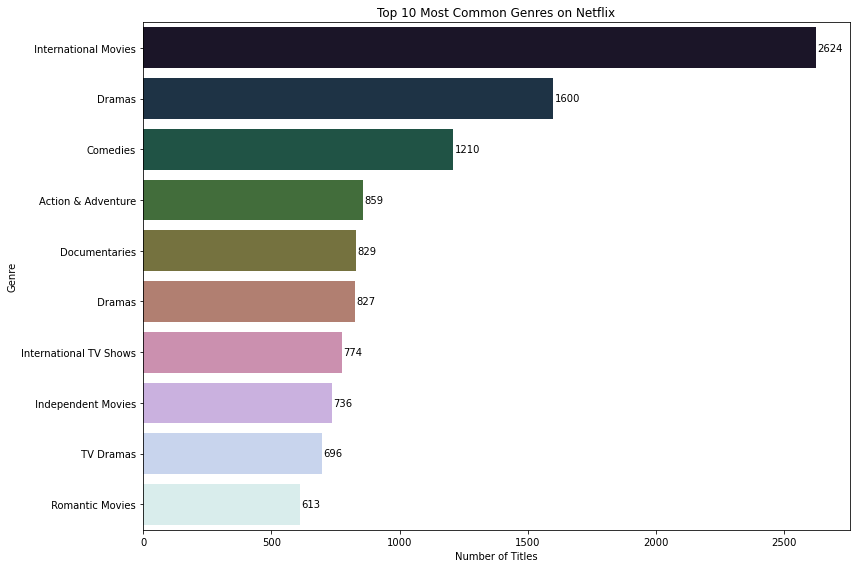

In [36]:
# Now lets plot the top 10 most common genres

plt.figure(figsize=(12,8))

ax = sns.countplot(
    data = genre_df,
    y = 'listed_in',
    order = genre_df['listed_in'].value_counts().head(10).index,
    palette = 'cubehelix'
)

for p in ax.patches:
    count = p.get_width()
    y_pos = p.get_y() + p.get_height() / 2
    ax.annotate(f'{int(count)}',
                xy = (count + 5, y_pos),
                ha = 'left', va = 'center', fontsize = 10, color = 'black'
    )
    

    
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

In [37]:
# Most common Ratings (like TV-MA, PG, etc.)

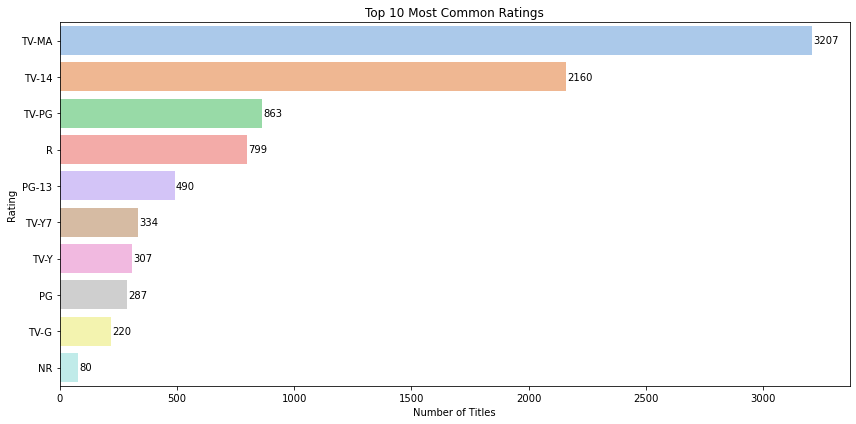

In [38]:
plt.figure(figsize=(12,6))

ax = sns.countplot(
    data = df,
    y = 'rating',
    order = df['rating'].value_counts().head(10).index,
    palette = 'pastel'
)

for p in ax.patches:
    count = p.get_width()
    y_pos = p.get_y() + p.get_height() / 2
    ax.annotate(f'{int(count)}',
                xy = (count + 5, y_pos),
                ha = 'left', va = 'center', fontsize = 10, color = 'black'
    )

    
plt.title("Top 10 Most Common Ratings")
plt.xlabel("Number of Titles")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

## Top countries producing Netflix content? 

In [39]:
country_df = df.copy()

country_df['country'] = country_df['country'].str.split(',')
country_df = country_df.explode('country')

In [40]:
top_countries = country_df['country'].value_counts().head(10)
print(top_countries)

United States     3211
India             1008
Unknown            831
United Kingdom     628
 United States     479
Canada             271
Japan              259
France             212
South Korea        211
 France            181
Name: country, dtype: int64


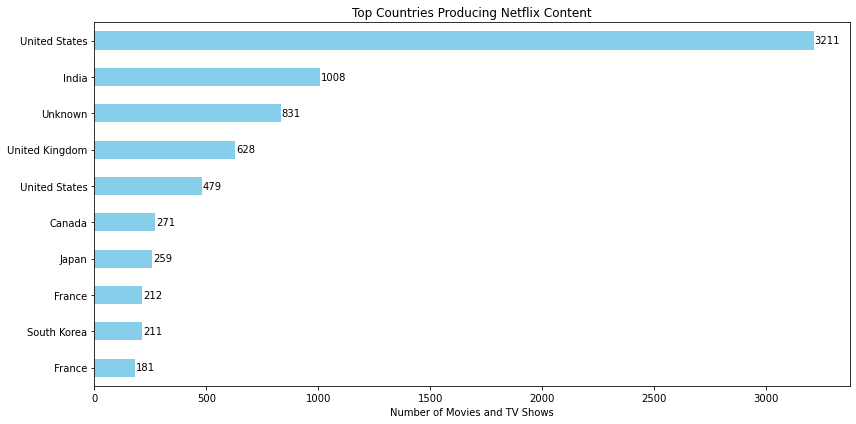

In [41]:
ax = top_countries.plot(kind='barh', figsize=(12,6), color='skyblue')

for p in ax.patches:
    count = p.get_width()
    y_pos = p.get_y() + p.get_height() / 2
    ax.annotate(f'{int(count)}',
                xy = (count + 5, y_pos),
                ha = 'left', va = 'center', fontsize = 10, color = 'black'
    )




plt.title("Top Countries Producing Netflix Content")
plt.xlabel("Number of Movies and TV Shows")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Content released by years.

### This tells us how old or recent most of the content is on Netflix
### Furthermore, it also tells us whether Netflix favours new releases or also streams older classics

In [42]:
df_release = df[df['release_year'] >= 1990]

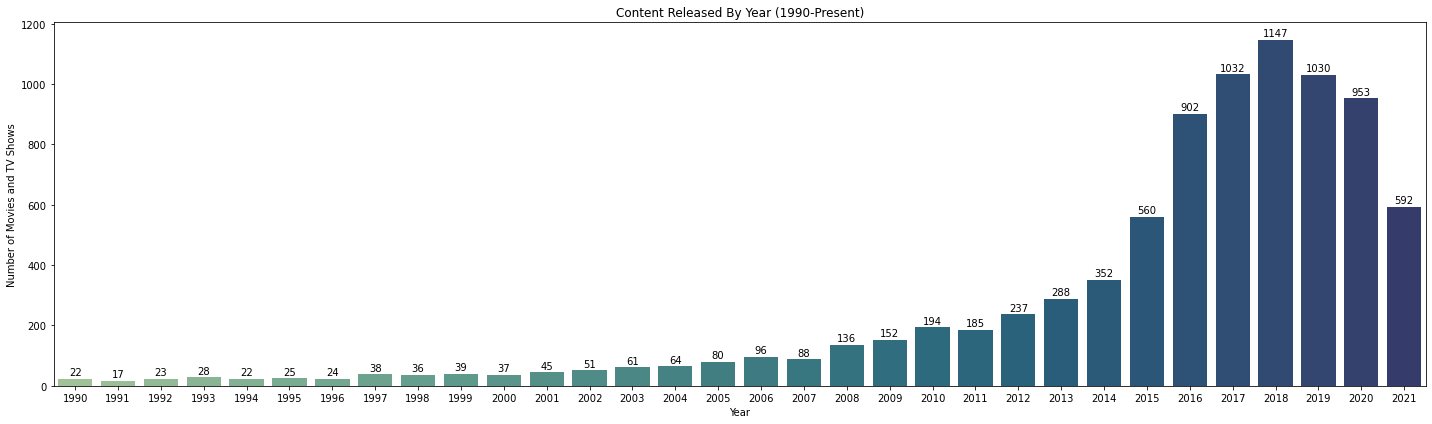

In [43]:
plt.figure(figsize=(20,6))

ax = sns.countplot(
    data = df_release,
    x = 'release_year',
    order = sorted(df_release['release_year'].unique()),
    palette = 'crest'
)

for p in ax.patches:
    count = p.get_height()
    x_pos = p.get_x() + p.get_width() / 2
    ax.annotate(f'{int(count)}',
                xy = (x_pos, count + 5),
                ha = 'center', va = 'bottom', fontsize = 10)
    
    
plt.title("Content Released By Year (1990-Present)")
plt.xlabel("Year")
plt.ylabel("Number of Movies and TV Shows")
plt.tight_layout()
plt.show()

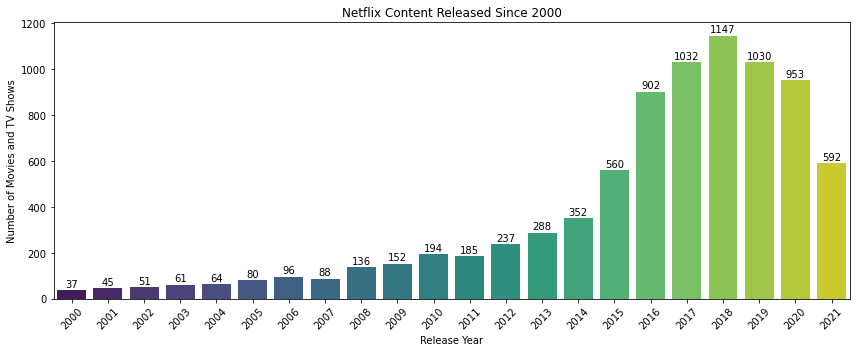

In [44]:
df_recent = df[df['release_year'] >= 2000]

plt.figure(figsize=(12, 5))
ax = sns.countplot(
    data=df_recent,
    x='release_year',
    order=sorted(df_recent['release_year'].unique()),
    palette='viridis'
)


for p in ax.patches:
    count = p.get_height()
    x_pos = p.get_x() + p.get_width() / 2
    ax.annotate(f'{int(count)}',
                xy = (x_pos, count + 5),
                ha = 'center', va = 'bottom', fontsize = 10)
    

plt.title("Netflix Content Released Since 2000")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies and TV Shows")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Word clouds from description/titles. 

In [45]:
from wordcloud import WordCloud, STOPWORDS

In [46]:
# combine all descriptions into one big string

text = ' '.join(df['description'].dropna().astype(str).tolist())

# add more stopwords if needed

stopwords = set(STOPWORDS)
stopwords.update(['series', 'film', 'movie', 'one', 'story'])

# generate word cloud

wordcloud = WordCloud(
    width = 1000, height = 500,
    background_color = 'white',
    stopwords = stopwords,
    colormap = 'Dark2',
    random_state = 42
).generate(text)


plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("Most Common Words in Description", fontsize = 20)
plt.show()


ValueError: Only supported for TrueType fonts

In [60]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all description text
text = ' '.join(df['description'].dropna().astype(str).tolist())

# Define stopwords
stopwords = set(STOPWORDS)
stopwords.update(['series', 'film', 'movie', 'one', 'story'])

# ✅ Use default font (don't set font_path!)
wordcloud = WordCloud(
    width=1000, height=500,
    background_color='white',
    stopwords=stopwords,
    colormap='Dark2',
    font_path='C:\Windows\Fonts\calibrib.ttf',  # ✅ Windows font path
    random_state=42
).generate(text)


# Plot
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Descriptions', fontsize=20)
plt.show()


ValueError: Only supported for TrueType fonts

In [59]:
import matplotlib.font_manager
for font in matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    print(font)


C:\WINDOWS\Fonts\GOUDOSB.TTF
C:\WINDOWS\Fonts\BELLB.TTF
C:\Windows\Fonts\Montserrat-ExtraLightItalic.ttf
C:\WINDOWS\Fonts\OCRAEXT.TTF
C:\WINDOWS\Fonts\POORICH.TTF
C:\Windows\Fonts\timesbi.ttf
C:\Windows\Fonts\Poppins-Regular.ttf
C:\WINDOWS\Fonts\NIAGSOL.TTF
C:\Windows\Fonts\SitkaI.ttc
C:\Windows\Fonts\LBRITEDI.TTF
C:\WINDOWS\Fonts\phagspa.ttf
C:\Windows\Fonts\trebucbi.ttf
C:\Windows\Fonts\framd.ttf
C:\Windows\Fonts\Poppins-Black.ttf
C:\WINDOWS\Fonts\Poppins-Thin.ttf
C:\WINDOWS\Fonts\ntailub.ttf
C:\WINDOWS\Fonts\ITCBLKAD.TTF
C:\Windows\Fonts\HATTEN.TTF
C:\Windows\Fonts\BRLNSDB.TTF
C:\WINDOWS\Fonts\VLADIMIR.TTF
C:\Windows\Fonts\Poppins-MediumItalic.ttf
C:\Windows\Fonts\FRAHV.TTF
C:\Windows\Fonts\LFAXI.TTF
C:\WINDOWS\Fonts\COPRGTB.TTF
C:\WINDOWS\Fonts\RAGE.TTF
C:\WINDOWS\Fonts\verdana.ttf
C:\WINDOWS\Fonts\BKANT.TTF
C:\Windows\Fonts\l_10646.ttf
C:\WINDOWS\Fonts\verdanab.ttf
C:\WINDOWS\Fonts\msyh.ttc
C:\WINDOWS\Fonts\WINGDNG2.TTF
C:\WINDOWS\Fonts\Montserrat-MediumItalic.ttf
C:\Windows\Fonts

In [62]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all text
text = ' '.join(df['description'].dropna().astype(str).tolist())

# Define stopwords
stopwords = set(STOPWORDS)
stopwords.update(['series', 'film', 'movie', 'one', 'story'])

# ✅ Use known good TrueType font
font_path = 'C:\\Windows\\Fonts\\calibri.ttf'  # DOUBLE BACKSLASH is important on Windows

# Generate the word cloud
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    stopwords=stopwords,
    colormap='Dark2',
    font_path=font_path,  # ✅ This forces the correct font
    random_state=42
).generate(text)

# Plot it
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Descriptions', fontsize=20)
plt.show()


ValueError: Only supported for TrueType fonts

## Content-Based Recommendation System 

### Model 1: TF-IDF + Cosine Similarity (on Description) 

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [48]:
# First lets prepare the data

# fill the missing description with empty string
df['description'] = df['description'].fillna('')


# use TF-IDF to vectorize text
tfidf = TfidfVectorizer(stop_words = 'english')
tfidf_matrix = tfidf.fit_transform(df['description'])

# compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [49]:
# now lets build a reverse lookup by title

# reset index to keep track of original rows

df = df.reset_index()
indices = pd.Series(df.index, index = df['title'].str.lower()).drop_duplicates()

In [50]:
# now lets define a recommendation function

def recommend_by_description(title, num_recommendations = 10):
    title = title.lower()
    if title not in indices:
        return f"❌ '{title}' not found in dataset."
    
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:num_recommendations+1]
    
    recommended_titles = [df['title'].iloc[i[0]] for i in sim_scores]
    
    return recommended_titles

In [56]:
recommend_by_description("friends")

['Manhattan Romance',
 'BoJack Horseman',
 'Things Heard & Seen',
 'Episodes',
 'Studio 54',
 "Dad's Army",
 'Trailer Park Boys',
 'Single Ladies Senior',
 'Why Are You Like This',
 'Menahi']

# Model 2: A Genre + Type-Based Filter Recommender

Recommend 10 random movies or tv shows based on user-selected:
Type: (Movie or TV Show)
Genre: (e.g. Drama, Action, Comedy)

In [58]:
# first of all, lets make a fresh copy of dataset for filtering

genre_filter_df = df.copy()


In [59]:
# split and explode genres

genre_filter_df = genre_filter_df['listed_in'].str.split(',')
genre_filter_df = genre_filter_df.explode('listed_in')

In [60]:
#built the filter based recommender function

import random

def recommend_by_genre_type(content_type = 'Movie', genre = 'Drama', num_recommendations = 10):
    
    # filter by type and genre
    filtered_df = genre_filter_df[
        (genre_filter_df['type'].str.lower() == content_type.lower()) &
        (genre_filter_df['listed_in'].str.lower() == genre.lower())        
    ]
    
    if filtered_df.empty:
        return f" No content found for {genre.title()} {content_type}s."
    
    
    # Randomly select titles
    recommendations = filtered_df['title'].drop_duplicates().sample(n=min(num_recommendation, len(filtered_df)))
    return recommendations.tolist()

In [63]:
# Rebuild the filtering DataFrame
genre_filter_df = df[['title', 'type', 'listed_in']].copy()

# Split and explode genres
genre_filter_df['listed_in'] = genre_filter_df['listed_in'].str.split(', ')
genre_filter_df = genre_filter_df.explode('listed_in')


In [65]:
#built the filter based recommender function

import random

def recommend_by_genre_type(content_type = 'Movie', genre = 'Drama', num_recommendations = 10):
    
    # filter by type and genre
    filtered_df = genre_filter_df[
        (genre_filter_df['type'].str.lower() == content_type.lower()) &
        (genre_filter_df['listed_in'].str.lower() == genre.lower())        
    ]
    
    if filtered_df.empty:
        return f" No content found for {genre.title()} {content_type}s."
    
    
    # Randomly select titles
    recommendations = filtered_df['title'].drop_duplicates().sample(n=min(num_recommendation, len(filtered_df)))
    return recommendations.tolist()

In [74]:
sorted(genre_filter_df['listed_in'].unique())


['action & adventure',
 'anime features',
 'anime series',
 'british tv shows',
 'children & family movies',
 'classic & cult tv',
 'classic movies',
 'comedies',
 'crime tv shows',
 'cult movies',
 'documentaries',
 'docuseries',
 'dramas',
 'faith & spirituality',
 'horror movies',
 'independent movies',
 'international movies',
 'international tv shows',
 "kids' tv",
 'korean tv shows',
 'lgbtq movies',
 'movies',
 'music & musicals',
 'reality tv',
 'romantic movies',
 'romantic tv shows',
 'sci-fi & fantasy',
 'science & nature tv',
 'spanish-language tv shows',
 'sports movies',
 'stand-up comedy',
 'stand-up comedy & talk shows',
 'teen tv shows',
 'thrillers',
 'tv action & adventure',
 'tv comedies',
 'tv dramas',
 'tv horror',
 'tv mysteries',
 'tv sci-fi & fantasy',
 'tv shows',
 'tv thrillers']

In [85]:
recommend_by_genre_type('tv show', 'tv comedies')


['What Happens to My Family',
 'GLOW',
 'My Dead Ex',
 'Dave Chappelle',
 'A Boy Name Flora A',
 'Paquita Salas',
 'Love Storm',
 'The Epic Tales of Captain Underpants in Space',
 'Somewhere Only We Know',
 'Ninja Turtles: The Next Mutation']